# Damage Paramatrization and Visualization

Author: Ian Viotti, 2022

## Import Modules

For simplification purposes, it was created an additional module `cluster_aux_fun` with the functions created for this notebook 
>the .py file must be placed in this same directory for correct importing

In [1]:
import cluster_aux_fun as caf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Damage definition

In this work, the skin and interface damage was modeled having an elliptical geometry having the following variable vector:

$var_{dam} = \{pos_x, pos_y, \theta, c, r\} $

in wich $c$ is the length of the ellipsis and $r$ the ratio for width and length.

## Plot damage using Shapely

For making easier dealing with geometry plotting, it was used Shapely package. 

> Note that it's not native to anaconda distribution package, so it must be installed using `pip install shapely`.

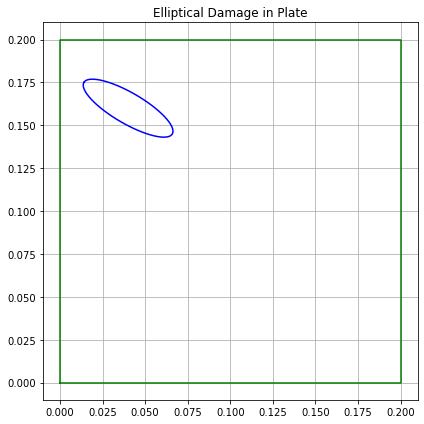

In [2]:
plate_x, plate_y = 0.2, 0.2 # Plate size

pos_x = 0.04
pos_y = 0.16
theta = 150 # [°]
c = 0.06
r = 0.3
dam_var = (pos_x, pos_y, theta, c, r)

caf.plot_damage(dam_var)

# Generates variables database for cluster

Here we define the number of models to create by defining an integer value to `cluster_size` and the min and max bounds for each variable.

A few notes can be taken regarding the variable bounds:

- Bounds were defined in tuples.
- Position or length bounds cannot be altered independently so it doesn't creates damage outside of the plate region.
- $\theta$ bounds are defined so we have ellipsis pointing in all directions
- The ratio bounds were defined so we have between 20% (thin) and 100% (circle) damages.

The variables database was created by calling `rand_data()` that uses `numpy.random.random()` to create randon values between variable limits.

It was also generated a number between 1 and 4 and vstacked to `var_data` to represent the number of the damaged ply.

In [8]:
cluster_size = 1000

bounds_pos_x = (0.04, 0.16) 
bounds_pos_y = (0.04, 0.16)
bounds_theta = (0, 180)
bounds_c = (0.02, 0.08)
bounds_r = (0.2, 1)

var_name = ('pos_x [m]', 'pos_y [m]', 'theta [°]', 'c [m]', 'r [m/m]', 'n')
var_bounds = (bounds_pos_x, bounds_pos_y, bounds_theta, bounds_c, bounds_r)
var_data = caf.rand_data(var_bounds, cluster_size)
#n = [np.random.randint(4) + 1 for i in range(cluster_size)] 
n = [4 for i in range(cluster_size)] 

var_data = np.vstack((var_data,n))

Simple loop for plotting all defined damage models 
> It's recommended to disable this if the cluster size is too great.

> The red rectangle represents the max bounds for the position of the center of the ellipsis.

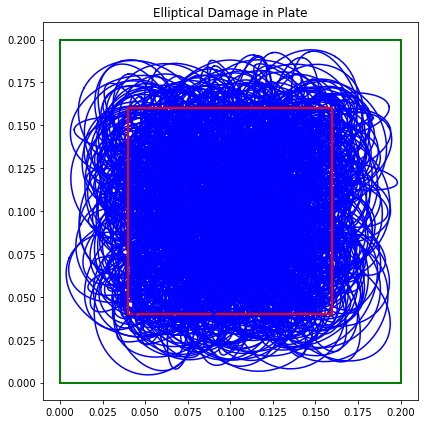

In [9]:
for i in range(len(var_data.T)):
    caf.plot_damage(var_data.T[i], min_bounds = bounds_pos_x[0], max_bounds = bounds_pos_y[1])

## Dataframe for managing variable data

This was done by using `Pandas` dataframe so it makes easier to visualize a large number of data.

In [10]:
var_dict = dict(zip(var_name,[i for i in var_data]))
df = pd.DataFrame(var_dict)
df

,pos_x [m],pos_y [m],theta [°],c [m],r [m/m],n
0,0.050755,0.104067,103.338855,0.058453,0.840362,4.0
1,0.156225,0.153357,77.428743,0.025476,0.710034,4.0
2,0.056288,0.150159,60.687147,0.035828,0.229148,4.0
3,0.045355,0.082035,109.764975,0.022826,0.474615,4.0
4,0.158312,0.140145,119.796519,0.072897,0.889372,4.0
...,...,...,...,...,...,...
995,0.156096,0.096746,63.352931,0.070214,0.931642,4.0
996,0.091665,0.124116,111.627565,0.063256,0.800139,4.0
997,0.092923,0.044414,146.652459,0.066568,0.570582,4.0
998,0.095739,0.090046,35.022258,0.049582,0.578498,4.0


Simple scatter plotting for visaulizing randomness in variables dataframe.

Writing a .csv file with all damage variables 

In [11]:
df.to_csv('damage_variables3.csv')

In [12]:
s = '1tring'
s[0].isnumeric()

True